In [1]:
import requests         #to send http requests
from bs4 import BeautifulSoup     #to scrap data from webpages

In [2]:
product = "shoes"
url  = f"https://www.flipkart.com/search?q={product}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
response = requests.get(url)
response.status_code     #to check server successfully returned the page 

200

In [3]:
page_content = response.text

In [4]:
page_content

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/appl

In [5]:
doc = BeautifulSoup(page_content,"html.parser")

In [6]:
print(doc.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/

In [7]:
doc

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-to

In [8]:
tag = doc.link
tag

<link href="https://rukminim1.flixcart.com" rel="preconnect"/>

In [9]:
tag['href']   #we can access tag's attribute by treating the tag like a dictionary

'https://rukminim1.flixcart.com'

### Next page link for products

In [10]:
next_page = doc.find("a",{"class":"_1LKTO3"})

In [11]:
next_page

<a class="_1LKTO3" href="/search?q=shoes&amp;otracker=search&amp;otracker1=search&amp;marketplace=FLIPKART&amp;as-show=on&amp;as=off&amp;page=2"><span>Next</span></a>

In [12]:
next_page['href']

'/search?q=shoes&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2'

### Brand Name 

In [13]:
brand_tag = doc.find_all("div",{"class":"_2WkVRV"})

In [14]:
brand_tag

[<div class="_2WkVRV">Airland</div>,
 <div class="_2WkVRV">CLYMB</div>,
 <div class="_2WkVRV">World Wear Footwear</div>,
 <div class="_2WkVRV">BIRDE</div>,
 <div class="_2WkVRV">BIRDE</div>,
 <div class="_2WkVRV">ASIAN</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">Axter</div>,
 <div class="_2WkVRV">aadi</div>,
 <div class="_2WkVRV">World Wear Footwear</div>,
 <div class="_2WkVRV">T-ROCK</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">Magnolia</div>,
 <div class="_2WkVRV">aadi</div>,
 <div class="_2WkVRV">aadi</div>,
 <div class="_2WkVRV">BIRDE</div>,
 <div class="_2WkVRV">ASIAN</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">HOTSTYLE</div>,
 <div class="_2WkVRV">density</div>,
 <div class="_2WkVRV">BRUTON</div>,
 <div class="_2WkVRV">CAMPUS</div>,
 <div class="_2WkVRV">BIRDE</div>,
 <div class="_2WkVRV">ASIAN</div>,
 <div class="_2WkVRV">ASIAN</div>,
 <div class=

In [15]:
brand_tag[0].text

'Airland'

### Link to product page

In [16]:
product_title_tag = doc.find_all("a",{"class":"IRpwTa"})

In [17]:
len(product_title_tag)  #One page shows 40 shoes

40

In [18]:
product_title_tag[0]

<a class="IRpwTa" href="/airland-new-02-grey-orange-training-gym-shoes-men/p/itm7fda20bbebdb2?pid=SHOFZVRECGZR6J2Z&amp;lid=LSTSHOFZVRECGZR6J2ZHIGZ2Q&amp;marketplace=FLIPKART&amp;q=shoes&amp;store=osp&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_Cou0rr9AOb0ilzrAgqHgVJCpFeqYHSq2V%2B4%2FD2dW2xoRKFvXGMsSAGbD1cxeBDmBxDjUm0VyVze6kuvpjlLsEg%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=mldbfajxcg0000001642425081953&amp;qH=b0a8b6f820479900" rel="noopener noreferrer" target="_blank" title="New -02 Grey Orange Training &amp; Gym Shoes For Men">New -02 Grey Orange Training &amp; Gym Shoes For Men</a>

In [19]:
product_link = []
for i in product_title_tag:
    product_link.append(i['href'])        #To extract only ref link 
len(product_link)

40

### Product title

In [20]:
product_title_tag[0]['title']

'New -02 Grey Orange Training & Gym Shoes For Men'

In [21]:
product_title_tag[0]['href'].split("/")[1]

'airland-new-02-grey-orange-training-gym-shoes-men'

In [22]:
product_title = []
for i in product_title_tag:
    product_title.append(i['title'])
    
len(product_title)

40

### Overall Rating of Product 

In [23]:
product_url = product_link[0]
product_page_response = requests.get(f"https://www.flipkart.com{product_url}")
product_page_response.status_code

200

In [24]:
product_page_content = product_page_response.text

In [25]:
product_page = BeautifulSoup(product_page_content,"html.parser")

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-to
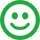
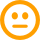

In [26]:
product_page

In [27]:
rating_tag = product_page.find("div",{"class":"_3LWZlK _3uSWvT"})

In [28]:
rating_tag

<div class="_3LWZlK _3uSWvT">3.8</div>

In [29]:
rating_tag.text

'3.8'

page url -> product url -> rating

For a Particular Product brand
Product_title , rating , review_title , review , Location , date , upvotes , downvotes

Done🆗   For Products
Brand , product_title , overall_rating , no. of reviews

### first page with brand , product_title , rating , price and product_url

In [123]:
def parsed(url):
    response = requests.get(url)
    content = response.text
    page = BeautifulSoup(content,"html.parser")
    return page

def get_rating(links):
    rate = []
    for product_url in links:
        product_page = parsed(f"https://www.flipkart.com{product_url}")
        rating_tag = product_page.find("div",{"class":"_3LWZlK _3uSWvT"})
        if rating_tag==None:
            rate.append(None)
        else:
            rate.append(rating_tag.text)
    return rate
                              
def get_price(page):
    price_tag = page.find_all("div",{"class":"_30jeq3"})
    product_price = []
    for i in price_tag:
        product_price.append(i.text.split("₹")[1])
    return product_price
                              
def get_dataset(url):
    import pandas as pd
    import numpy as np
    from tqdm import tqdm
    brands = []
    product_link1 = []
    product_title1 = []
    ratings = []
    price = []
    for i in tqdm(range(1,2)):          #for 1 page
        page = f"{url}&page={i}"
        parser = parsed(page)
    
        brand_tag = parser.find_all("div",{"class":"_2WkVRV"})    #class will not be same for all products
        
        for j in brand_tag:
            brands.append(j.text)

        product_title_tag = parser.find_all("a",{"class":"IRpwTa"})
        product_link2 = []

        for k in product_title_tag:
            product_link1.append(k['href'])
            product_title1.append(k['href'].split("/")[1])
            product_link2.append(k['href'])
            
        star= get_rating(product_link2)
        for l in star:
            ratings.append(l)
                              
        price_list = get_price(parser)
        for p in range(0,40):
            price.append(price_list[p])
    
                              
    dataset = pd.DataFrame({"brand": brands,"product_title":product_title1,"overall_rating":ratings,"price":price,"product_url":product_link1})
    return dataset

In [31]:
product = "shoes"
url  = f"https://www.flipkart.com/search?q={product}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
df = get_dataset(url)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:48<00:00, 48.81s/it]


In [32]:
df

,brand,product_title,overall_rating,price,product_url
0,World Wear Footwear,world-wear-footwear-affordable-collection-styl...,3.7,245,/world-wear-footwear-affordable-collection-sty...
1,BIRDE,birde-combo-pack-2-sports-shoes-running-men,3.6,559,/birde-combo-pack-2-sports-shoes-running-men/p...
2,BIRDE,birde-walking-shoes-men,3.8,535,/birde-walking-shoes-men/p/itm34da835b8e711?pi...
3,BRUTON,bruton-trendy-sports-running-shoes-men,None,299,/bruton-trendy-sports-running-shoes-men/p/itm6...
4,ASIAN,asian-rider-01-white-running-shoes-men-sport-b...,4,"1,099",/asian-rider-01-white-running-shoes-men-sport-...
5,Axter,axter-exclusive-range-stylish-casual-walking-c...,3.7,259,/axter-exclusive-range-stylish-casual-walking-...
6,aadi,aadi-running-shoes-men,3.7,319,/aadi-running-shoes-men/p/itm2b3542f509660?pid...
7,World Wear Footwear,world-wear-footwear-affordable-range-stylish-c...,3.7,348,/world-wear-footwear-affordable-range-stylish-...
8,BRUTON,bruton-fit-man-slip-sneakers-men,3.9,228,/bruton-fit-man-slip-sneakers-men/p/itmf3xrhvg...
9,BRUTON,bruton-fit-man-slip-sneakers-men,3.9,228,/bruton-fit-man-slip-sneakers-men/p/itmf6yvkvp...


In [6]:
# df.to_csv("shoes_flipkart2.csv")     #to save dataset in local system

### Product_title , username, rating , review_title , review , Location , date , upvotes , downvotes

In [33]:
df.product_url[0]

'/world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running/p/itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART&q=shoes&store=osp&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=953f27cc-cbaf-439d-b027-1574032b405f.SHOFV2ADZEKYVY9W.SEARCH&ppt=None&ppn=None&ssid=yi96ym88kw0000001642425265156&qH=b0a8b6f820479900'

In [34]:
reviews = []
page = parsed(f"https://www.flipkart.com{df.product_url[0]}")
review_tag = page.find_all("div",{"class":"_6K-7Co"})
for i in review_tag:
    reviews.append(i.text)

In [35]:
reviews

['How is it look but not that is ...so ghatiya',
 'Bad shoes',
 'The shoes quality is Zero']

In [36]:
df.product_url

0     /world-wear-footwear-affordable-collection-sty...
1     /birde-combo-pack-2-sports-shoes-running-men/p...
2     /birde-walking-shoes-men/p/itm34da835b8e711?pi...
3     /bruton-trendy-sports-running-shoes-men/p/itm6...
4     /asian-rider-01-white-running-shoes-men-sport-...
5     /axter-exclusive-range-stylish-casual-walking-...
6     /aadi-running-shoes-men/p/itm2b3542f509660?pid...
7     /world-wear-footwear-affordable-range-stylish-...
8     /bruton-fit-man-slip-sneakers-men/p/itmf3xrhvg...
9     /bruton-fit-man-slip-sneakers-men/p/itmf6yvkvp...
10    /magnolia-canvas-shoes-men/p/itmb42a681797f2d?...
11    /aadi-casuals-men/p/itmfgef2t8yxzrhb?pid=SHOFG...
12    /birde-sports-running-shoes-sneakers-men/p/itm...
13    /asian-elasto-02-sports-shoes-women-running-gi...
14    /hotstyle-running-shoes-men/p/itm5694b3a1d6910...
15    /density-socks-running-shoes-men/p/itm3f19bb00...
16    /bruton-trendy-men-sports-running-shoes/p/itm5...
17    /birde-running-shoes-men/p/itmb1585bb311bf

In [45]:
"itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART" == "itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART"

True

In [37]:
df.product_title[0]

'world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running'

In [41]:
r_select = "/product-reviews/itmd6ee8e25bbf4d?pid=SHOFSM8UJTSPYZD5&lid=LSTSHOFSM8UJTSPYZD5JW3LFK&marketplace=FLIPKART"

username, rating , review_title , review , Location , date , upvotes , downvotes

In [39]:
df.product_title

0     world-wear-footwear-affordable-collection-styl...
1           birde-combo-pack-2-sports-shoes-running-men
2                               birde-walking-shoes-men
3                bruton-trendy-sports-running-shoes-men
4     asian-rider-01-white-running-shoes-men-sport-b...
5     axter-exclusive-range-stylish-casual-walking-c...
6                                aadi-running-shoes-men
7     world-wear-footwear-affordable-range-stylish-c...
8                      bruton-fit-man-slip-sneakers-men
9                      bruton-fit-man-slip-sneakers-men
10                            magnolia-canvas-shoes-men
11                                     aadi-casuals-men
12              birde-sports-running-shoes-sneakers-men
13    asian-elasto-02-sports-shoes-women-running-gir...
14                           hotstyle-running-shoes-men
15                      density-socks-running-shoes-men
16               bruton-trendy-men-sports-running-shoes
17                              birde-running-sh

In [57]:
prod_url = df.product_url[0]
prod_url

'/world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running/p/itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART&q=shoes&store=osp&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=953f27cc-cbaf-439d-b027-1574032b405f.SHOFV2ADZEKYVY9W.SEARCH&ppt=None&ppn=None&ssid=yi96ym88kw0000001642425265156&qH=b0a8b6f820479900'

In [69]:
v  = prod_url.replace("/p/","/product-reviews/").split("&q=")[0]
v

'/world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running/product-reviews/itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART'

### Products reviews

In [82]:
from tqdm import tqdm
prod_reviews = []
for i in tqdm(df.product_url):
    reviews = []
    for k in range(1,6):    #getting 5 review pages
        r_select = i.replace("/p/","/product-reviews/").split("&q=")[0]
        review_pages = f"https://www.flipkart.com{r_select}&page={k}"
        page = parsed(review_pages)
        review_tag = page.find_all("div",{"class":"_6K-7Co"})
        for j in review_tag:
            reviews.append(j.text)
    prod_reviews.append(reviews)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [02:52<00:00,  4.30s/it]


In [83]:
prod_reviews

[['How is it look but not that is ...so ghatiya',
  'Bad shoes',
  'Wrost quality, shoe less holes are teared once I tide it up.',
  'The shoes quality is Zero',
  'NICE PRODUCT',
  'Bad',
  'Very loose not adjustable my foot',
  'Quality is bad',
  'Very nice',
  'Best Product',
  'Bad qualities shoes',
  'Useful',
  'Good quality',
  'Very nice',
  'Good',
  'Good',
  'Nice shoes comfortable😊',
  'Good product ❣️❣️❣️',
  'ok',
  '4*quality',
  'Good',
  'Nice',
  'Good',
  'Thanks',
  'Good',
  'Nice products',
  'Very good',
  'Good look very good',
  'Quality is bad',
  'Nice 👍🙂',
  'So nice 🙂',
  'very good product',
  'Nice product',
  'Nice',
  'Super',
  'Bad prodec',
  'Nice product',
  'Very good quality',
  'Very.nice product',
  'I am happy',
  'Super',
  'Nice',
  'Good product',
  '\u200cnice shoes',
  "Not good don't buy",
  'Super',
  'Mind blowing shoe in 200-300',
  'Good',
  'Thank yu filipkart',
  'Nice'],
 ['Very nice 🙂',
  'Gud quality',
  'Nice product... Thnxx t

13-08-2021

In [84]:
# r_select is different for every product

In [103]:
df.product_url[0]

'/echor-men-s-sneakers-fashion-lightweight-running-shoes-tennis-casual-walking-men/p/itm5de2f0b5e4bf7?pid=SHOG7WG5XFMNKKWK&lid=LSTSHOG7WG5XFMNKKWKYCDIOJ&marketplace=FLIPKART&q=shoes&store=osp&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_Ka87Q0i7hWSYlnO8f1xpbgVU%2FseeuRcAgKmfWjM11ccQHswfva1zEFsARhosMH7s9hvhUromfiTPthwxpIxtNw%3D%3D&ppt=None&ppn=None&ssid=0ivxaqt75c0000001642347744905&qH=b0a8b6f820479900'

### Review Star

In [90]:
u = "https://www.flipkart.com/echor-men-s-sneakers-fashion-lightweight-running-shoes-tennis-casual-walking-men/product-reviews/itmd6ee8e25bbf4d?pid=SHOFSM8UJTSPYZD5&lid=LSTSHOFSM8UJTSPYZD5JW3LFK&marketplace=FLIPKART&page=54"
p = parsed(u)
outer_tag = p.find("div",{"class":"_1YokD2 _3Mn1Gg col-9-12"})
ot = outer_tag.find_all("div",{"class":"_1AtVbE col-12-12"})

In [94]:
ot[0].find("div",{"class":"_3LWZlK _1BLPMq _3B8WaH"})

<div class="_3LWZlK _1BLPMq _3B8WaH">5</div>

In [106]:
if len(ot)==11:
    ot = ot[:-1]
elif len(ot)==12:
    ot = ot[1:-1]

In [97]:
u = "https://www.flipkart.com/echor-men-s-sneakers-fashion-lightweight-running-shoes-tennis-casual-walking-men/product-reviews/itmd6ee8e25bbf4d?pid=SHOFSM8UJTSPYZD5&lid=LSTSHOFSM8UJTSPYZD5JW3LFK&marketplace=FLIPKART&page=54"
p = parsed(u)
l = []
for i in range(1):      
    outer_tag = p.find("div",{"class":"_1YokD2 _3Mn1Gg col-9-12"})
    ot = outer_tag.find_all("div",{"class":"_1AtVbE col-12-12"})
    if len(ot)==11:
        ot = ot[:-1]
    elif len(ot)==12:
        ot = ot[1:-1]
    star = []
    for i in ot:
        star_tag = i.find("div",{"class":"_3LWZlK _1BLPMq _3B8WaH"})  #3-4-5 star
        if star_tag is None:      #If find() can’t find anything, it returns None
            star_tag = i.find("div",{"class":"_3LWZlK _32lA32 _1BLPMq _3B8WaH"}) #2 star
            if star_tag is None:
                star_tag = i.find("div",{"class":"_3LWZlK _1rdVr6 _1BLPMq _3B8WaH"}) #1 star
        star.append(star_tag.text)  
    l.append(star)

In [98]:
l

[['5', '5', '5', '5', '4', '5', '4', '5', '2', '4']]

In [99]:
#To get how many review pages are there 
def get_review_page_no(parsed_page):           #getting parsed page of product as argument
    r = parsed_page.find("span",{"class":"_2_R_DZ"})  #class is common for all products
    s = r.text
    results = int(s.split()[3].replace(",",""))
    pages = int(results/10)
    return pages

#### we have a product and we are trying to fetch all the reviews of that particular product with rating of review, date of review, username, location  

In [120]:
df.product_url[0]

'/world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running/p/itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART&q=shoes&store=osp&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=953f27cc-cbaf-439d-b027-1574032b405f.SHOFV2ADZEKYVY9W.SEARCH&ppt=None&ppn=None&ssid=yi96ym88kw0000001642425265156&qH=b0a8b6f820479900'

In [155]:
def get_reviews(prod_url):
    from tqdm import tqdm
    import pandas as pd
    user_name = []
    user_rating = []
    user_location = []
    dor = []    #date of review
    user_reviews = []
#     no_of_rev_pages = get_review_page_no(prod_parsed_url)
    
    for k in tqdm(range(1,6)):    #getting 5 review pages
        r_select = prod_url.replace("/p/","/product-reviews/").split("&q=")[0]
        review_pages = f"{r_select}&page={k}"
        page = parsed(review_pages)
        outer_tag = page.find("div",{"class":"_1YokD2 _3Mn1Gg col-9-12"})
        
        #getting user_reviews
        review_tag = outer_tag.find_all("div",{"class":"_6K-7Co"})
        for j in review_tag:
            user_reviews.append(j.text)
            
        #getting user_name
        name_tags = outer_tag.find_all("p",{"class":"_2sc7ZR _2V5EHH _1QgsS5"})
        for j in name_tags:
            user_name.append(j.text)
            
        #getting user_rating
        ot = outer_tag.find_all("div",{"class":"_1AtVbE col-12-12"})
        if len(ot)==11:
            ot = ot[:-1]
        elif len(ot)==12:
            ot = ot[1:-1]
        for i in ot:
            star_tag = i.find("div",{"class":"_3LWZlK _1BLPMq _3B8WaH"})  #3-4-5 star
            if star_tag is None:      #If find() can’t find anything, it returns None
                star_tag = i.find("div",{"class":"_3LWZlK _32lA32 _1BLPMq _3B8WaH"}) #2 star
                if star_tag is None:
                    star_tag = i.find("div",{"class":"_3LWZlK _1rdVr6 _1BLPMq _3B8WaH"}) #1 star
            if star_tag is None:
                user_rating.append(None)
            else:
                user_rating.append(star_tag.text)  
            
        #getting user_location
        loc_tags = outer_tag.find_all("p",{"class":"_2mcZGG"})
        for l in loc_tags:
            ls = l.text.split(",")
            if len(ls)==1:
                user_location.append("")
            else:
                user_location.append(l.text.split(",")[1].strip())
        
        #getting date_of_review
        date_tags = outer_tag.find_all("p",{"class":"_2sc7ZR"})
        c=0
        for d in date_tags:
            if c==0:
                c=1
                continue
            else:
                c=0
                dor.append(d.text)
                
    reviews = {"username":user_name,"Rating":user_rating,"date":dor,"location":user_location,"Review":user_reviews}
    df = pd.DataFrame(reviews)
    return df

In [156]:
product = input("what you want to search - ")
url  = f"https://www.flipkart.com/search?q={product}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
df = get_dataset(url)

what you want to search - shoes


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:44<00:00, 44.81s/it]


In [157]:
df

,brand,product_title,overall_rating,price,product_url
0,World Wear Footwear,world-wear-footwear-affordable-collection-styl...,3.8,245,/world-wear-footwear-affordable-collection-sty...
1,BIRDE,birde-combo-pack-2-sports-shoes-running-men,3.6,559,/birde-combo-pack-2-sports-shoes-running-men/p...
2,BIRDE,birde-walking-shoes-men,3.8,535,/birde-walking-shoes-men/p/itm34da835b8e711?pi...
3,ASIAN,asian-rider-01-white-running-shoes-men-sport-b...,4,"1,099",/asian-rider-01-white-running-shoes-men-sport-...
4,aadi,aadi-running-shoes-men,3.7,319,/aadi-running-shoes-men/p/itm2b3542f509660?pid...
5,BRUTON,bruton-trendy-sports-running-shoes-men,3.8,299,/bruton-trendy-sports-running-shoes-men/p/itm6...
6,HOTSTYLE,hotstyle-running-shoes-men,3.8,249,/hotstyle-running-shoes-men/p/itm5694b3a1d6910...
7,Axter,axter-exclusive-range-stylish-casual-walking-c...,3.7,259,/axter-exclusive-range-stylish-casual-walking-...
8,BRUTON,bruton-fit-man-slip-sneakers-men,3.9,228,/bruton-fit-man-slip-sneakers-men/p/itmf3xrhvg...
9,BRUTON,bruton-fit-man-slip-sneakers-men,3.9,228,/bruton-fit-man-slip-sneakers-men/p/itmf6yvkvp...


In [159]:
df.product_url[0]

'/world-wear-footwear-affordable-collection-stylish-sports-shoes-men-running/p/itmf24255ddad36f?pid=SHOFV2ADZEKYVY9W&lid=LSTSHOFV2ADZEKYVY9WGQ5TTY&marketplace=FLIPKART&q=shoes&store=osp&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=c6a3d799-0238-4cf6-b66b-13e58f36bf7f.SHOFV2ADZEKYVY9W.SEARCH&ppt=None&ppn=None&ssid=wezqwjwk7k0000001642503414589&qH=b0a8b6f820479900'

In [162]:
#getting reviews for a product
p = df.product_url[4]
url = f"https://www.flipkart.com{p}"
df = get_reviews(url)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.23it/s]


In [169]:
df

,username,Rating,date,location,Review
0,Flipkart Customer,5,"Nov, 2020",Shivamogga,Superrrr exelent i loved it looking awesome .....
1,Deepak Kumar,3,"Sep, 2019",,nice
2,Flipkart Customer,5,"Aug, 2019",,deliveryman good behave nd product was awsm.
3,Manoj Vishwakarma,3,"Aug, 2019",,gud
4,Gangadhar Behera,5,"Dec, 2019",Cuttack District,product is very good
5,Akash Jha,4,"Nov, 2020",Mumbai,Over all good product in these range. Good fit...
6,Nehal Marik,3,"Nov, 2019",Medinipur,Average
7,Flipkart Customer,3,7 months ago,Noida,Nice product
8,Pramod Kumar,5,"Feb, 2020",Dausa,Comfortable
9,sahil kumar,5,"Sep, 2019",Delhi,i am using this shoes since last 2 days. and i...


In [149]:
# def get_products_with_rev(url):
#     import pandas as pd
#     import numpy as np
#     from tqdm import tqdm
    
#     new_brands = []
#     new_prod_name = []
#     brands = []
#     product_link1 = []
#     product_title1 = []
#     ratings = []
#     price = []
#     for i in tqdm(range(1,2)):          #for 1 page
#         page = f"{url}&page={i}"
#         parser = parsed(page)
    
#         brand_tag = parser.find_all("div",{"class":"_2WkVRV"})    #class will not be same for all products
        
#         for j in brand_tag:
#             brands.append(j.text)

#         product_title_tag = parser.find_all("a",{"class":"IRpwTa"})
#         product_link2 = []

#         for k in product_title_tag:
#             product_link1.append(k['href'])
#             product_title1.append(k['href'].split("/")[1])
#             product_link2.append(k['href'])
            
#         star= get_rating(product_link2)
#         for l in star:
#             ratings.append(l)
                              
#         price_list = get_price(parser)
#         for p in range(0,40):
#             price.append(price_list[p])
    
    
#     for j in tqdm(range(len(product_link))):
#         l = product_link[j]
#         link = f"https://www.flipkart.com{l}"
# #         p = parsed(link)
#         d = get_reviews(link)
#         new_brands.append(brands[j]*50)
#         new_prod_name.append(product_title1[j]*50)
                              
#     dataset = pd.DataFrame({"brand": new_brands,"product_name":new_prod_name,"overall_rating":ratings,"price":price,"username":d["username"],"rating":d["Rating"],"date":d["date"],"location":d["location"],"review":d["Review"]})
#     return dataset